The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data:
*What is the most commonly awarded gender and birth country?
*Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
*Which decade and Nobel Prize category combination had the highest proportion of female laureates?
*Who was the first woman to receive a Nobel Prize, and in what category?
*Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [1]:
# Loading required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("/kaggle/input/schools/nobel.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [2]:
gender = df["sex"].value_counts()
country = df["birth_country"].value_counts()

top_g= gender.sort_values(ascending=False).index[0]
top_c = country.sort_values(ascending= False).index[0]

print(top_g,top_c)

Male United States of America


In [3]:
us = df[df["birth_country"]=="United States of America"]

# we are dividing the value for each year by 10 to get the value as floor and then multiply by 10 to get the decade
us_dec = (np.floor(us["year"] / 10) * 10).astype(int)

us_ratio = us_dec.value_counts(normalize=True).sort_values(ascending=False).index[0]

print(us_ratio)

2000


decade                 2020
category         Literature
female_winner           0.5
Name: 68, dtype: object

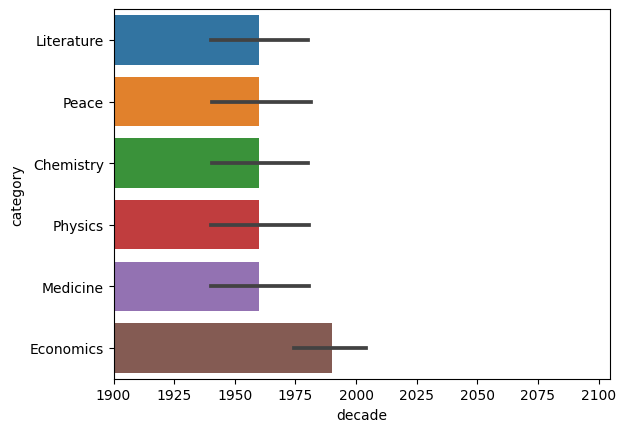

In [4]:
df['decade'] = (np.floor(df["year"] / 10) * 10).astype(int)
df["female_winner"]= df["sex"]=="Female"
df2= df.groupby(["decade","category"],as_index=False)["female_winner"].mean().sort_values(by="female_winner",ascending=False)
max_female_dict = df2.iloc[0]

sns.barplot(data=df2,x = 'decade',y='category')
plt.xlim(1900,None)
max_female_dict


In [5]:
female=df[df["sex"]=="Female"]

sorted_female = female.sort_values(by="year",ascending= True)
first_woman_name =sorted_female.loc[19,"full_name"]

first_woman_category= sorted_female.loc[19,"category"]
print(first_woman_name,first_woman_category)

Marie Curie, née Sklodowska Physics


In [6]:
df_rank = df["full_name"].value_counts()
repeat= df_rank[df_rank >= 2].index
repeat_list = list(repeat)
repeat_list


['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']